## Homework 1
From Chapter 3, found on page 129 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [51]:
# Import standard libraries
import numpy as np
import pandas as pd

import statsmodels.api as sm
from matplotlib.pyplot import subplots
# Import specific objects
from textwrap import wrap # to avoiding label overlapping in plots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


_a)_	Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `model.summary()` function to print the results. Comment on the output

(i) Is there a relationship between the predictor and the response?

(ii) How strong is the relationship between the predictor and the response?

(iii) Is the relationship between the predictor and the response positive or negative?

(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [65]:
# Define the predictor and response variables
X =  Auto['horsepower']
y = Auto['mpg']

# Add a constant to the predictor variable (required for the intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() # to specify the model and fit the model
model.summary()

# # Prediction for a horsepower of 98

# X_new = pd.DataFrame.query(Auto,'horsepower == 98') 
# print(X_new)
# predicted_mpg = model.predict(X_new)

# # Calculate the 95% confidence interval for the prediction
# conf_interval = model.get_prediction(X_new).conf_int(alpha=0.05)
# pred_interval = model.get_prediction(X_new).pred_int(alpha=0.05)

# print(f"Predicted MPG for horsepower of {98}: {predicted_mpg[0]}")
# print(f"95% Confidence Interval: {conf_interval[0]}")
# print(f"95% Prediction Interval: {pred_interval[0]}")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 31 May 2024   Prob (F-statistic):           7.03e-81
Time:                        22:45:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 1. The output tells us that ˆβ0 = 39.9359 and ˆβ1 = -0.1578, where ^β1 <> 0 this means there is a relationship between the predictor and the response.
 2. Adj. R-squared:	0.605 where R-sqr is < 1 means strong relationship.
 3. Coefficient for horsepower is negative, it means its an inverse relationship, meaning higher horsepower is associated with lower mpg.
 4. Not able to predict for horoscope 98

_b)_	Plot the response and the predictor in a new set of axes `ax` using `scatter`. Use the `ax.plot()` function with the predictor and the model prediction as defined in the lab to display the least squares regression line.

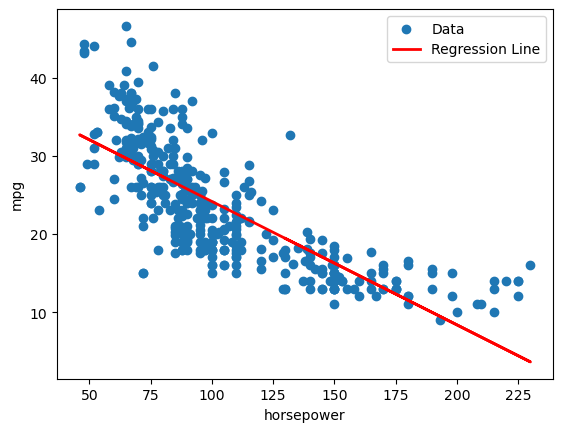

In [66]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extracting 'mpg' and 'horsepower' columns from the dataset
mpg = Auto['mpg'] #Y
horsepower = Auto['horsepower'] # x

# Reshape 'horsepower' to a 2D array for LinearRegression
rm_reshaped = horsepower.values.reshape(-1, 1)

# Fit a linear regression model
lm_mpg_horsepower = LinearRegression()
lm_mpg_horsepower.fit(rm_reshaped, mpg)

# Plot 'mpg' against 'horsepower'
plt.scatter(horsepower, mpg, label='Data')
plt.xlabel('horsepower')
plt.ylabel('mpg')

# Plot the regression line
plt.plot(horsepower, lm_mpg_horsepower.predict(rm_reshaped), color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()


_c)_	Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

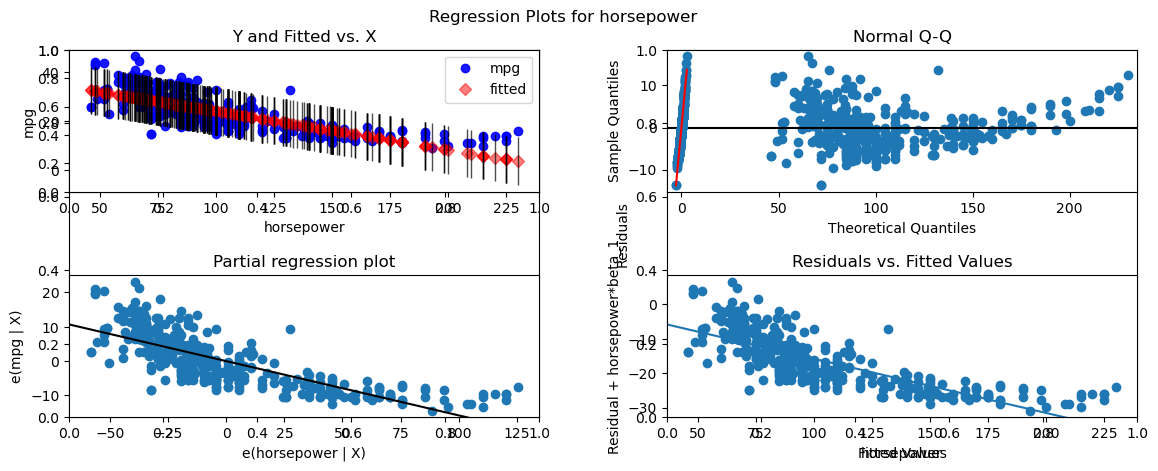

In [77]:
import seaborn as sns

# Create the residuals
residuals = model.resid
fitted_values = model.fittedvalues

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(2, 2, 1)
# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(model, 'horsepower', fig=fig)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# # Normal Q-Q
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Normal Q-Q')

plt.show()

Additional Practice Questions: 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer? 
- What are the key insights you would want to show? 
- Can you think of a business context where this exercise would have applications?